In [2]:
import pandas as pd
import numpy as np
from narwhals.stable.v1 import Datetime
from pandas import DateOffset

In [3]:
# till now
# Timestamp
pd.Timestamp('6th aug 2025 8:10')

# DatetimeIndex -> df and series index
pd.DatetimeIndex([
    pd.Timestamp('6th aug 2025 8:10'),
    pd.Timestamp('7th aug 2025 8:10'),
    pd.Timestamp('8th aug 2025 8:10')
])[0]

# date_range()
pd.date_range(start= '2025/8/6', end='2025/8/20', freq='2D')

# to_datetime()
s = pd.Series(['2025/8/6','2025/8/7','2025/8/8'])
s   # but here s is object type

0    2025/8/6
1    2025/8/7
2    2025/8/8
dtype: object

In [4]:
s = pd.to_datetime(s)   # converts to datetimeindex
s.dt.day_name()   # day name of each date

0    Wednesday
1     Thursday
2       Friday
dtype: object

## Timedelta
- Represents a duration, the difference between two dates or times.
- Can be created using `pd.Timedelta`, `pd.to_timedelta`, or by performing arithmetic operations on `Timestamp` or `DatetimeIndex` objects.
- Supports various units such as days, hours, minutes, seconds, and milliseconds.
- Useful for date arithmetic, such as adding or subtracting time from a date.
- Can be used in time series analysis to represent time intervals.

In [5]:
# using Timestamp : subtraction of two timestamps
t1 = pd.Timestamp('2025/8/6 8:10')
t2 = pd.Timestamp('2025/8/7 10:15')
print(t2 - t1)
print(t1 - t2)

1 days 02:05:00
-2 days +21:55:00


In [6]:
# using Timedelta
pd.Timedelta('1 days 2 hours 5 minutes')

Timedelta('1 days 02:05:00')

In [7]:
# Arithmetic operations
t1 + pd.Timedelta('2 days 3 hours')

Timestamp('2025-08-08 11:10:00')

In [8]:
pd.date_range(start='2025/8/6', periods=10, freq='D')

DatetimeIndex(['2025-08-06', '2025-08-07', '2025-08-08', '2025-08-09',
               '2025-08-10', '2025-08-11', '2025-08-12', '2025-08-13',
               '2025-08-14', '2025-08-15'],
              dtype='datetime64[ns]', freq='D')

In [9]:
 pd.date_range(start='2025/8/6', periods=10, freq='D') + pd.Timedelta('2 days 3 hours')

DatetimeIndex(['2025-08-08 03:00:00', '2025-08-09 03:00:00',
               '2025-08-10 03:00:00', '2025-08-11 03:00:00',
               '2025-08-12 03:00:00', '2025-08-13 03:00:00',
               '2025-08-14 03:00:00', '2025-08-15 03:00:00',
               '2025-08-16 03:00:00', '2025-08-17 03:00:00'],
              dtype='datetime64[ns]', freq='D')

In [39]:
# Example
temp = pd.read_csv("../DataSets/supply_chain_resilience_dataset.csv")
temp

,Order_ID,Buyer_ID,Supplier_ID,Product_Category,Quantity_Ordered,Order_Date,Dispatch_Date,Delivery_Date,Shipping_Mode,Order_Value_USD,...,Supplier_Reliability_Score,Organization_ID,Dominant_Buyer_Flag,Available_Historical_Records,Data_Sharing_Consent,Federated_Round,Parameter_Change_Magnitude,Communication_Cost_MB,Energy_Consumption_Joules,Supply_Risk_Flag
0,O1000,B33,S23,Textiles,469,2023-10-24,2023-10-27,2023-10-28,Rail,36273.99,...,0.73,Org13,0,127,1,10,0.0225,2.27,236.06,0
1,O1001,B1,S20,Machinery,365,2023-07-07,2023-07-08,2023-07-09,Road,34780.36,...,0.88,Org8,1,909,1,7,0.0412,3.10,257.80,0
2,O1002,B2,S10,Food,333,2023-12-28,2023-12-29,2024-01-07,Rail,7154.54,...,0.95,Org4,0,262,1,8,0.1183,2.82,165.38,1
3,O1003,B6,S10,Machinery,142,2023-01-14,2023-01-17,2023-01-20,Rail,15320.08,...,0.92,Org18,1,807,1,9,0.2611,3.59,377.47,0
4,O1004,B5,S4,Machinery,897,2023-01-12,2023-01-14,2023-01-16,Road,18256.42,...,0.60,Org13,0,789,1,7,0.2775,3.42,83.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,O1995,B23,S27,Pharma,31,2023-06-27,2023-07-01,2023-07-10,Sea,42701.10,...,0.93,Org9,0,518,1,10,0.3041,3.70,147.10,1
996,O1996,B45,S2,Electronics,419,2023-01-07,2023-01-10,2023-01-19,Rail,46929.28,...,0.74,Org20,0,188,1,3,0.0678,2.40,69.62,1
997,O1997,B22,S24,Electronics,904,2023-03-11,2023-03-13,2023-03-16,Sea,4712.62,...,0.86,Org15,0,762,1,6,0.0376,3.43,187.43,0
998,O1998,B10,S26,Textiles,524,2023-05-07,2023-05-10,2023-05-18,Air,19587.08,...,0.70,Org4,0,847,1,7,0.2119,1.67,363.11,0


In [40]:
temp = temp[['Order_Date' , 'Delivery_Date']]
temp

,Order_Date,Delivery_Date
0,2023-10-24,2023-10-28
1,2023-07-07,2023-07-09
2,2023-12-28,2024-01-07
3,2023-01-14,2023-01-20
4,2023-01-12,2023-01-16
...,...,...
995,2023-06-27,2023-07-10
996,2023-01-07,2023-01-19
997,2023-03-11,2023-03-16
998,2023-05-07,2023-05-18


In [41]:
temp.shape

(1000, 2)

In [42]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order_Date     1000 non-null   object
 1   Delivery_Date  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [20]:
# since both columns are object type , we need to convert them to datetime type
temp['Order_Date'] = pd.to_datetime(temp['Order_Date'])
temp['Delivery_Date'] = pd.to_datetime(temp['Delivery_Date'])

In [21]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_Date     1000 non-null   datetime64[ns]
 1   Delivery_Date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 15.8 KB


In [22]:
temp['Time_Taken'] = temp['Delivery_Date'] - temp['Order_Date']   # gives Timedelta

In [23]:
temp

,Order_Date,Delivery_Date,Time_Taken
0,2023-10-24,2023-10-28,4 days
1,2023-07-07,2023-07-09,2 days
2,2023-12-28,2024-01-07,10 days
3,2023-01-14,2023-01-20,6 days
4,2023-01-12,2023-01-16,4 days
...,...,...,...
995,2023-06-27,2023-07-10,13 days
996,2023-01-07,2023-01-19,12 days
997,2023-03-11,2023-03-16,5 days
998,2023-05-07,2023-05-18,11 days


In [24]:
temp['Time_Taken'].mean()

Timedelta('9 days 11:11:02.400000')

# Time Series

A **time series** is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic (or other domain) variable changes over time.

### Examples

- **Financial Data** (company stocks)
- **Natural Data** (rainfall measurement)
- **Event Data** (COVID cases, etc.)
- **Medical Data** (heart rate monitoring)

### Types of Operations on Time Series

- **Time Series Analysis**
- **Time Series Forecasting**

In [32]:
google = pd.read_csv('../DataSets/GOOGL.csv')
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [48]:
temp1 = pd.read_csv("../DataSets/supply_chain_resilience_dataset.csv")
temp1 = temp1[['Order_Date', 'Quantity_Ordered' , 'Order_Value_USD']]
temp1

,Order_Date,Quantity_Ordered,Order_Value_USD
0,2023-10-24,469,36273.99
1,2023-07-07,365,34780.36
2,2023-12-28,333,7154.54
3,2023-01-14,142,15320.08
4,2023-01-12,897,18256.42
...,...,...,...
995,2023-06-27,31,42701.10
996,2023-01-07,419,46929.28
997,2023-03-11,904,4712.62
998,2023-05-07,524,19587.08


In [49]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_Date        1000 non-null   object 
 1   Quantity_Ordered  1000 non-null   int64  
 2   Order_Value_USD   1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [50]:
temp1['Order_Date'] = pd.to_datetime(temp1['Order_Date'])
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Date        1000 non-null   datetime64[ns]
 1   Quantity_Ordered  1000 non-null   int64         
 2   Order_Value_USD   1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.6 KB


In [51]:
temp1.set_index('Order_Date',inplace=True)
temp1.head()

,Quantity_Ordered,Order_Value_USD
Order_Date,,
2023-10-24,469,36273.99
2023-07-07,365,34780.36
2023-12-28,333,7154.54
2023-01-14,142,15320.08
2023-01-12,897,18256.42


In [33]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [34]:
google['Date'] = pd.to_datetime(google['Date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4431 non-null   datetime64[ns]
 1   Open       4431 non-null   float64       
 2   High       4431 non-null   float64       
 3   Low        4431 non-null   float64       
 4   Close      4431 non-null   float64       
 5   Adj Close  4431 non-null   float64       
 6   Volume     4431 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 242.4 KB


In [35]:
google.set_index('Date',inplace=True)
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


- Fetch a specific date

In [56]:
temp1.loc['2023-10-24']

,Quantity_Ordered,Order_Value_USD
Order_Date,,
2023-10-24,469,36273.99
2023-10-24,131,48065.55


In [60]:
google.loc['2020-10-23']

Open         1.615050e+03
High         1.634120e+03
Low          1.611910e+03
Close        1.632980e+03
Adj Close    1.632980e+03
Volume       1.527400e+06
Name: 2020-10-23 00:00:00, dtype: float64

- Partial Indexing (only year or year-month)

In [72]:
temp1.sort_index(inplace=True)   # sorting index is important for time series data
temp1

,Quantity_Ordered,Order_Value_USD
Order_Date,,
2023-01-01,924,23170.79
2023-01-01,27,15253.58
2023-01-01,467,34051.75
2023-01-02,675,3189.44
2023-01-02,643,36578.64
...,...,...
2023-12-30,696,7446.06
2023-12-30,43,31305.99
2023-12-30,536,3057.60


In [74]:
temp1.loc['2023-01']

,Quantity_Ordered,Order_Value_USD
Order_Date,,
2023-01-01,924,23170.79
2023-01-01,27,15253.58
2023-01-01,467,34051.75
2023-01-02,675,3189.44
2023-01-02,643,36578.64
...,...,...
2023-01-30,107,42030.37
2023-01-30,986,33253.37
2023-01-30,530,37535.10


In [81]:
temp1.loc['2023']

,Quantity_Ordered,Order_Value_USD
Order_Date,,
2023-01-01,924,23170.79
2023-01-01,27,15253.58
2023-01-01,467,34051.75
2023-01-02,675,3189.44
2023-01-02,643,36578.64
...,...,...
2023-12-30,696,7446.06
2023-12-30,43,31305.99
2023-12-30,536,3057.60


- create a new column for month name , day name , weekday, etc.

In [86]:
temp1['Month'] = temp1.index.month_name()
temp1['Day'] = temp1.index.day_name()
temp1['Quarter'] = temp1.index.quarter

In [88]:
temp1.head()

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-01,924,23170.79,January,Sunday,1
2023-01-01,27,15253.58,January,Sunday,1
2023-01-01,467,34051.75,January,Sunday,1
2023-01-02,675,3189.44,January,Monday,1
2023-01-02,643,36578.64,January,Monday,1


In [90]:
google['Month'] = google.index.month_name()
google['Day'] = google.index.day_name()
google['Quarter'] = google.index.quarter

In [91]:
google

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,August,Thursday,3
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,August,Friday,3
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,August,Monday,3
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,August,Tuesday,3
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,August,Wednesday,3
...,...,...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,March,Friday,1
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,March,Monday,1
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,March,Tuesday,1


- Slicing :
    - it is possible because the index is sorted and it is datetime type .

In [94]:
temp1['2023-01-10':'2023-01-15']

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-10,358,44143.69,January,Tuesday,1
2023-01-10,321,2282.93,January,Tuesday,1
2023-01-10,464,17191.73,January,Tuesday,1
2023-01-10,444,48221.88,January,Tuesday,1
2023-01-10,391,45457.31,January,Tuesday,1
2023-01-11,423,6301.59,January,Wednesday,1
2023-01-11,117,32905.21,January,Wednesday,1
2023-01-12,849,14298.61,January,Thursday,1
2023-01-12,897,18256.42,January,Thursday,1


In [95]:
temp1['2023-01-10':'2023-01-15' : 3]

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-10,358,44143.69,January,Tuesday,1
2023-01-10,444,48221.88,January,Tuesday,1
2023-01-11,117,32905.21,January,Wednesday,1
2023-01-12,168,8570.25,January,Thursday,1
2023-01-12,400,10361.16,January,Thursday,1
2023-01-13,997,37026.91,January,Friday,1
2023-01-14,93,35495.34,January,Saturday,1
2023-01-14,790,23217.56,January,Saturday,1


In [97]:
# Challenge : fetch data for every 8th day of each month in 2023
temp1['2023-01-01':'2023-12-31'][temp1.index.day == 8]

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-08,510,7572.36,January,Sunday,1
2023-01-08,97,15937.26,January,Sunday,1
2023-01-08,580,47085.48,January,Sunday,1
2023-01-08,544,36077.61,January,Sunday,1
2023-02-08,63,1456.72,February,Wednesday,1
2023-02-08,201,27015.00,February,Wednesday,1
2023-02-08,380,49666.12,February,Wednesday,1
2023-03-08,928,15179.72,March,Wednesday,1
2023-03-08,930,37671.52,March,Wednesday,1


In [127]:
# Challenge : fetch data for every 8th day of each month in 2023

google[(google.index.day == 8) & (google.index.month == 7)]

# or

google[google.index.isin(pd.date_range(start='2005-07-08', end='2022-07-8', freq = pd.DateOffset(years = 1))) ]

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2005-07-08,148.273270,148.898895,147.172165,148.263260,148.263260,14900285,July,Friday,3
2008-07-08,273.268280,277.872864,270.270264,277.542542,277.542542,9854935,July,Tuesday,3
2009-07-08,200.200195,203.203201,199.229233,201.446442,201.446442,6875518,July,Wednesday,3
2010-07-08,227.001999,228.893890,225.055054,228.508514,228.508514,5332462,July,Thursday,3
2011-07-08,266.741730,269.094086,263.898895,266.261261,266.261261,9530860,July,Friday,3
2013-07-08,450.055054,453.588593,448.988983,452.997986,452.997986,3935061,July,Monday,3
2014-07-08,586.369995,587.969971,574.000000,578.400024,578.400024,2125200,July,Tuesday,3
2015-07-08,545.599976,548.280029,541.200012,541.700012,541.700012,1383100,July,Wednesday,3
2016-07-08,710.559998,717.900024,708.109985,717.780029,717.780029,1497300,July,Friday,3


In [119]:
# Challenge : fetch data for last day of each month in 2023
temp1['2023-01-01':'2023-12-31'][temp1.index.is_month_end]

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-31,20,30695.37,January,Tuesday,1
2023-01-31,980,46104.72,January,Tuesday,1
2023-02-28,96,37060.57,February,Tuesday,1
2023-02-28,834,3767.49,February,Tuesday,1
2023-03-31,700,46492.41,March,Friday,1
2023-03-31,598,23031.01,March,Friday,1
2023-03-31,718,23953.59,March,Friday,1
2023-03-31,139,1943.90,March,Friday,1
2023-03-31,964,35961.66,March,Friday,1


<Axes: xlabel='Date'>

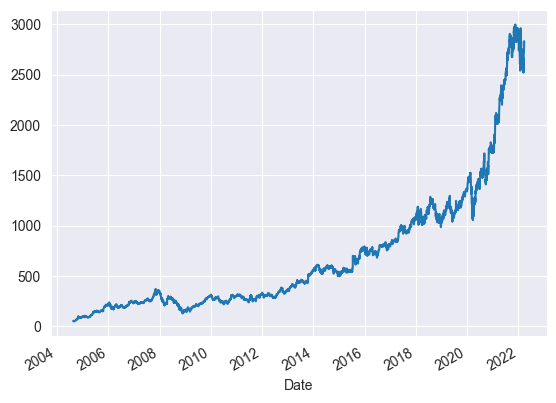

In [129]:
# vizualization of a single column .
google['Close'].plot()

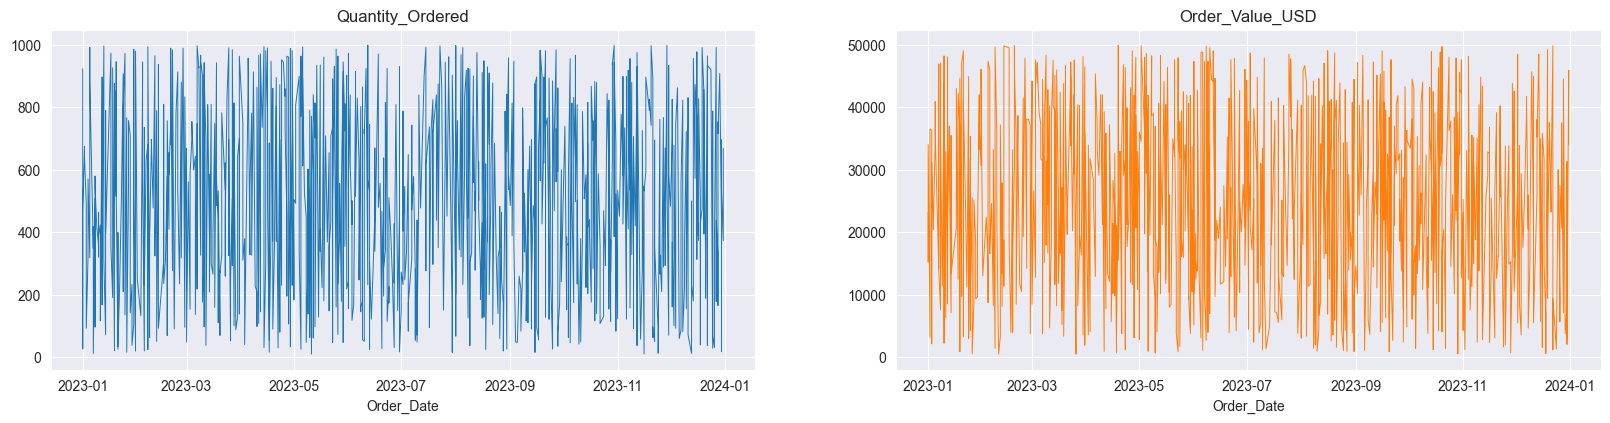

In [141]:
# vizualization of multiple columns
subset_temp1 = temp1[['Quantity_Ordered' , 'Order_Value_USD']]
ax = subset_temp1.plot(
    subplots=True,
    layout=(3, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=10,
    legend=False,
    figsize=(20, 15),
    title=['Quantity_Ordered','Order_Value_USD']
)

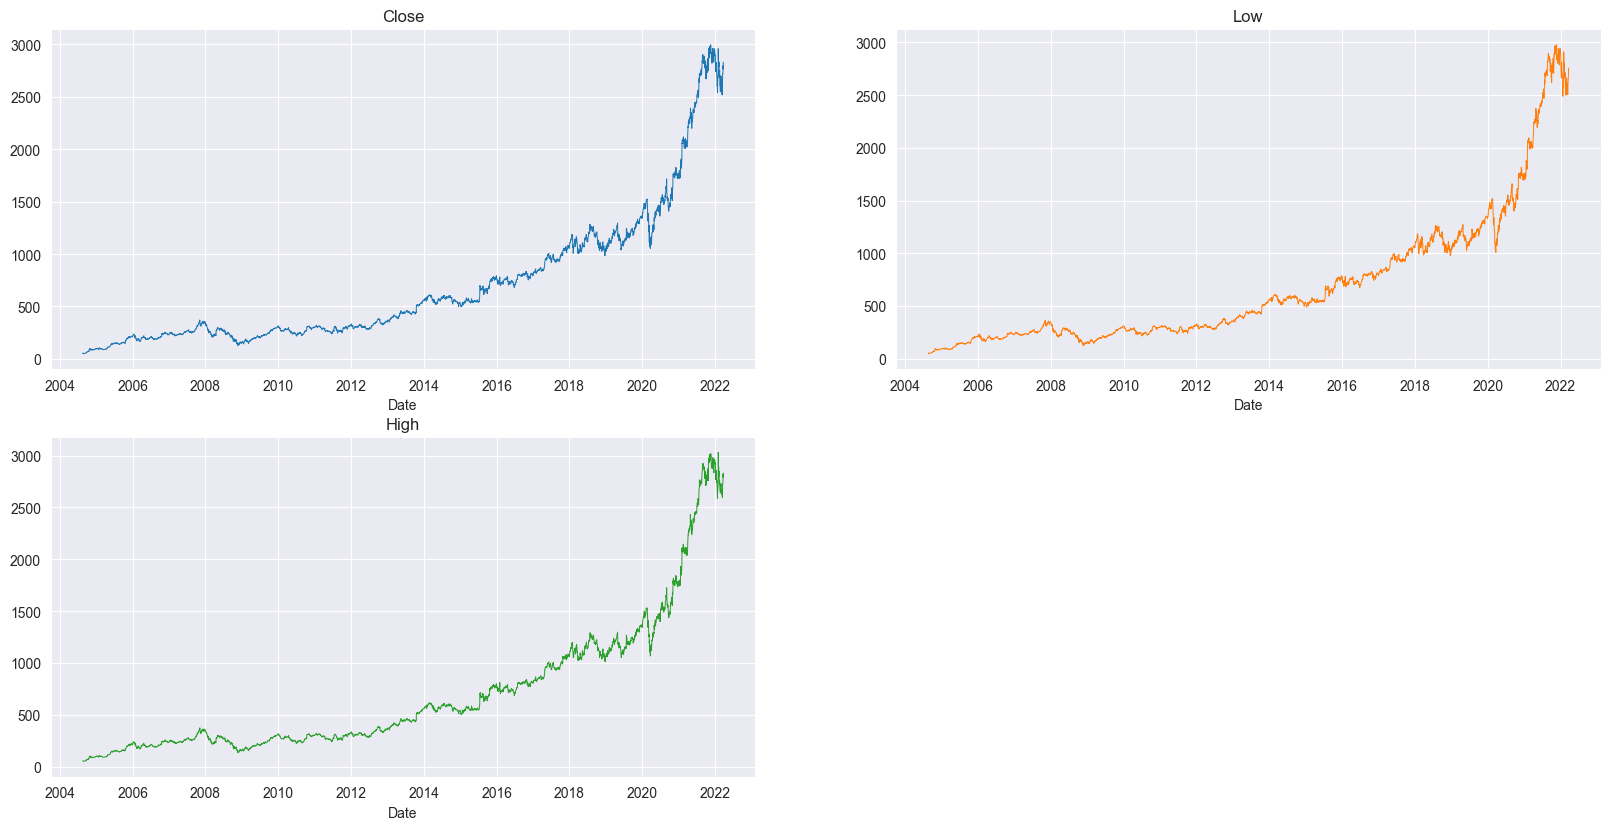

In [142]:
# vizualization of multiple columns
sub_google = google[['Close', 'Low' , 'High']]
ax = sub_google.plot(
    subplots=True,
    layout=(3, 2),
    sharex=False,
    sharey=False,
    linewidth=0.7,
    fontsize=10,
    legend=False,
    figsize=(20, 15),
    title=['Close','Low' , 'High']
)

<Axes: xlabel='Date'>

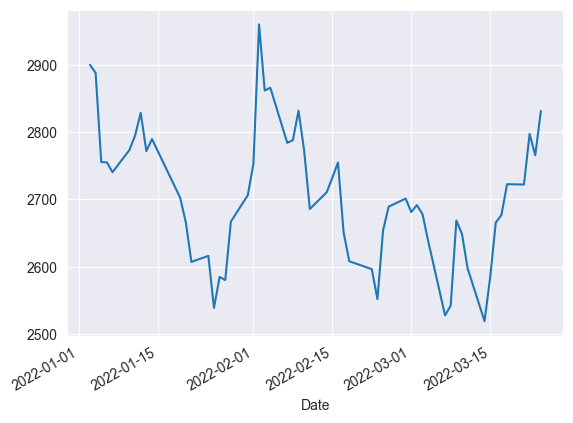

In [143]:
# plot for a specific year or month
google.loc['2022']['Close'].plot()

In [146]:
# frequency
temp1.index     # It has none frequency
google.index    # It has none frequency

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4431, freq=None)

In [153]:
# asfreq : convert the series to the specified frequency
x = google.asfreq('D')  # daily frequency
x.index
# so now all the dates are present not only the trading dates but the values are NaN for non trading dates .

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-21', '2004-08-22',
               '2004-08-23', '2004-08-24', '2004-08-25', '2004-08-26',
               '2004-08-27', '2004-08-28',
               ...
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=6427, freq='D')

In [151]:
google = google.asfreq('B')   # business day frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-03-11', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24'],
              dtype='datetime64[ns]', name='Date', length=4591, freq='B')

In [156]:
google.asfreq('QS')

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-10-01,65.465462,67.187187,64.514519,66.356354,66.356354,15124860.0,October,Friday,4.0
2005-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04-01,90.970970,91.566566,90.085083,90.110107,90.110107,12351636.0,April,Friday,2.0
2005-07-01,147.667664,148.268265,144.754761,145.770767,145.770767,18436745.0,July,Friday,3.0
2005-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-01,2092.250000,2135.750000,2091.429932,2129.780029,2129.780029,1994000.0,April,Thursday,2.0
2021-07-01,2434.500000,2451.739990,2430.629883,2448.889893,2448.889893,905500.0,July,Thursday,3.0


In [157]:
google.asfreq('YE')

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-12-31,99.714714,100.040039,96.376373,96.491493,96.491493,15321663.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,349.634644,351.596588,345.635651,346.086090,346.086090,4747648.0,December,Monday,4.0
2008-12-31,152.252258,155.655655,151.456451,153.978973,153.978973,5767826.0,December,Wednesday,4.0
2009-12-31,312.687683,313.013000,310.300293,310.300293,310.300293,2437160.0,December,Thursday,4.0
2010-12-31,298.668671,299.509521,296.311310,297.282288,297.282288,3075521.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,350.350342,355.640656,348.348358,354.044037,354.044037,3990805.0,December,Monday,4.0


In [162]:
google.asfreq('6h' , method='ffill')   # forward fill

,Open,High,Low,Close,Adj Close,Volume,Month,Day,Quarter
Date,,,,,,,,,
2004-08-19 00:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 06:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 12:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-19 18:00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096.0,August,Thursday,3.0
2004-08-20 00:00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-03-23 00:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700.0,March,Wednesday,1.0
2022-03-23 06:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700.0,March,Wednesday,1.0
2022-03-23 12:00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700.0,March,Wednesday,1.0


In [163]:
temp1

,Quantity_Ordered,Order_Value_USD,Month,Day,Quarter
Order_Date,,,,,
2023-01-01,924,23170.79,January,Sunday,1
2023-01-01,27,15253.58,January,Sunday,1
2023-01-01,467,34051.75,January,Sunday,1
2023-01-02,675,3189.44,January,Monday,1
2023-01-02,643,36578.64,January,Monday,1
...,...,...,...,...,...
2023-12-30,696,7446.06,December,Saturday,4
2023-12-30,43,31305.99,December,Saturday,4
2023-12-30,536,3057.60,December,Saturday,4


<Axes: xlabel='Month'>

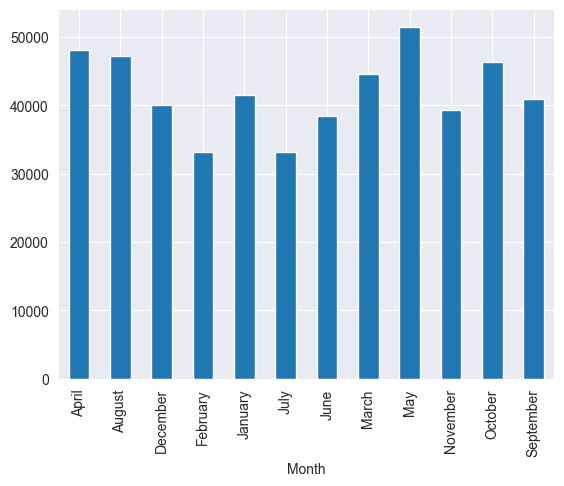

In [167]:
# monthly trend of Quantity_Ordered
temp1.groupby('Month')['Quantity_Ordered'].sum().plot(kind='bar')

<Axes: xlabel='Day'>

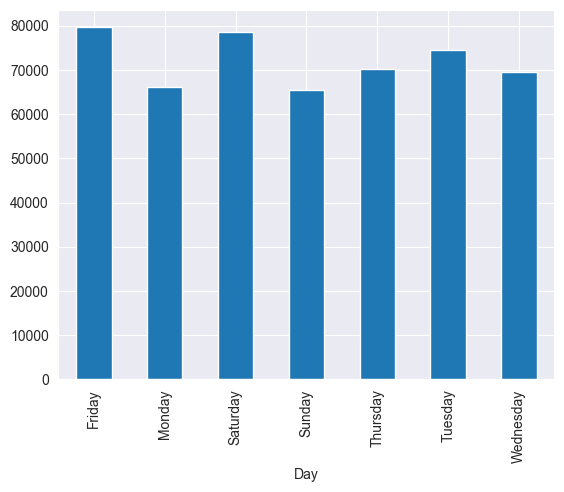

In [170]:
# daily trend of Quantity_Ordered
temp1.groupby('Day')['Quantity_Ordered'].sum().plot(kind='bar')

<Axes: xlabel='Month'>

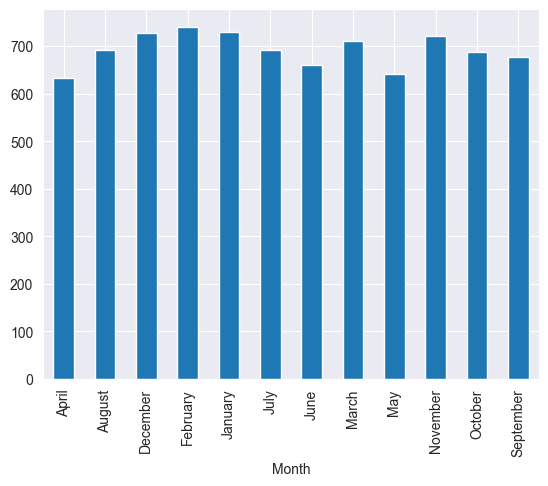

In [172]:
google.groupby('Month')['Close'].mean().plot(kind='bar')

## Resampling

Resampling involves changing the frequency of your time series observations , it is used to observe data at different time intervals than the original observations.

Two types of resampling are:

**Upsampling:** Increasing the frequency of the samples (e.g., from minutes to seconds).

**Downsampling:** Decreasing the frequency of the samples (e.g., from days to months).

### Downsampling :
- it is used to reduce the data size and to observe long term trends , by reducing noise .
- generally downsampling is done by aggregation functions like mean , sum , etc.
- used more often than upsampling .

C:\Users\RITESH\AppData\Local\Temp\ipykernel_2532\2013605141.py:3: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  google['Close'].resample('QE').mean().plot()


<Axes: xlabel='Date'>

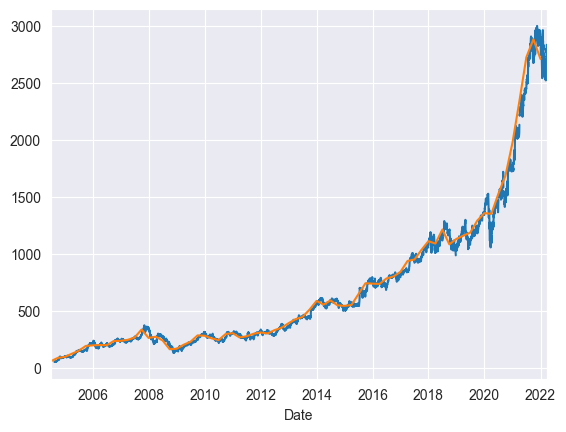

In [180]:
google['Close'].plot()
google['Close'].resample('QE').mean().plot()

### upsampling  :
- it is used to increase the data size and to observe short term trends , by increasing noise .
- generally upsampling is done by interpolation methods like forward fill , backward fill , linear interpolation , etc.

<Axes: xlabel='Date'>

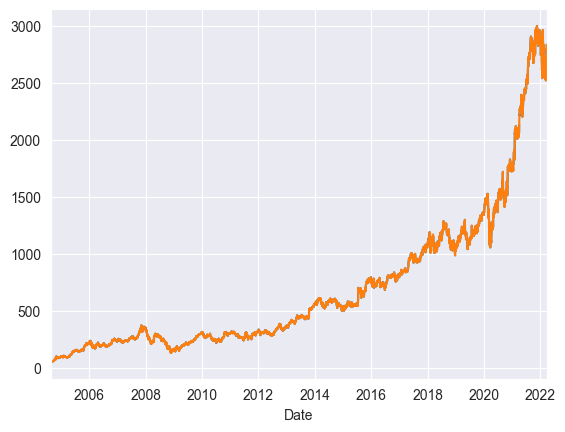

In [186]:
google['Close'].plot()
google['Close'].resample('h').interpolate(method='linear').plot()

## Rolling Window (Smoothing)

- Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages, is a useful technique for smoothing time series data.
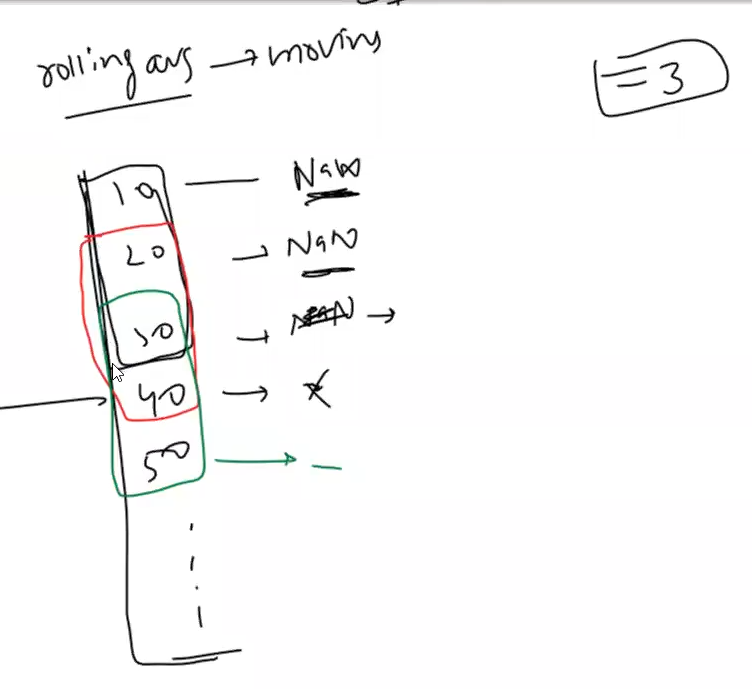   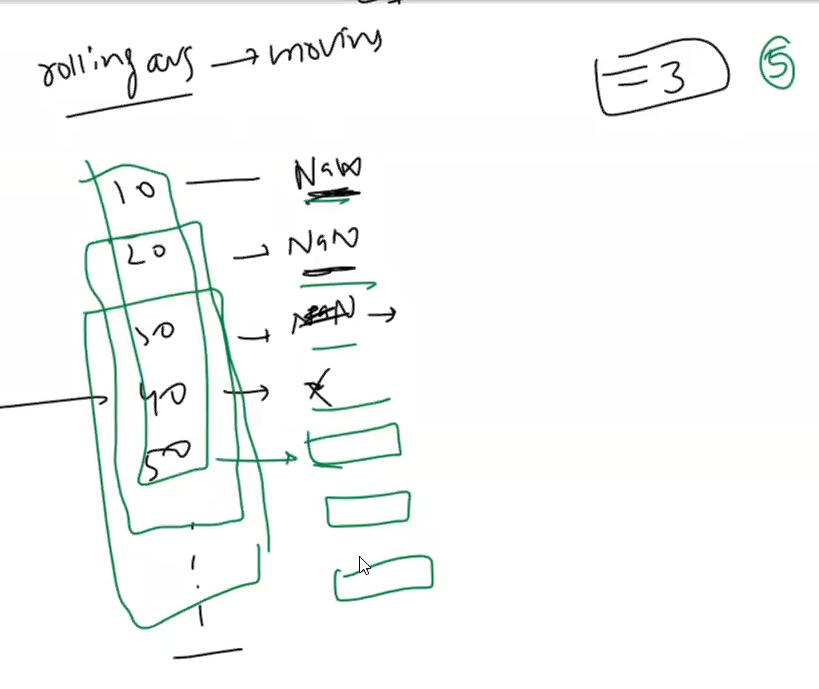

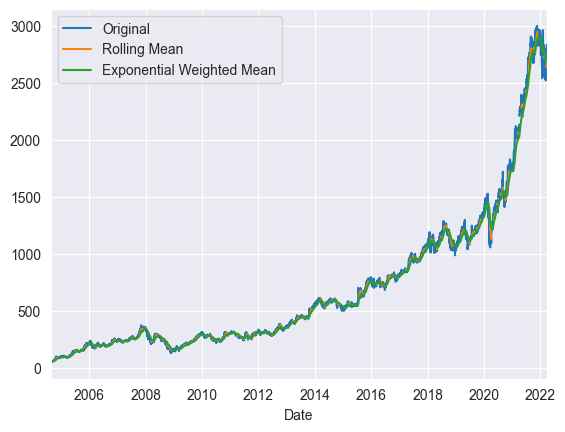

In [201]:
import matplotlib.pyplot as plt

ax = google['Close'].plot(label='Original')
google['Close'].rolling(20).mean().plot(ax=ax, label='Rolling Mean')
google['Close'].ewm(20).mean().plot(ax=ax, label='Exponential Weighted Mean')
plt.legend()
plt.show()
# here ewm -> exponential weighted mean : gives more weightage to recent values than older values